# `fd_p5p1_nu_spectra.ipynb`
M. Dolce. 
Feb. 2024
### notebook to plot the Enu spectrum from the h5 files used in CVN training.
### Used mostly for validation purposes, and gain a sense of the composition of interaction types.

This validation is using `file_27_of_28.h5` as Ashley indicated, which is what we use here. 

Requires the following input:
-- `HORN: 'FHC' or 'RHC'`
-- `FLUX: 'Fluxswap' or 'Nonswap'`


In [17]:
#TODO: try running it....


In [18]:
import os.path
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns

## Read in the input.

In [19]:
# collect the horn current: 'FHC' or 'RHC'
HORN = input("Enter 'FHC' or 'RHC':")
print(HORN)

FHC


In [30]:
# collect the swap: 'Fluxswap' or 'Nonswap'
FLUX = input("Enter 'Fluxswap' or 'Nonswap':")
print(FLUX)

Nonswap


In [31]:
# define the path to the validation files
validation_path = '/Users/michaeldolce/Development/files/h5-files/validation/'
    
! ls -rtlh $validation_path

total 1002032
-rw-r--r--  1 michaeldolce  staff   479M Oct 23 13:13 trimmed_h5_R20-11-25-prod5.1reco.j_FD-Nominal-FHC-Fluxswap_27_of_28.h5
-rw-r--r--  1 michaeldolce  staff   4.5M Feb  1 15:28 trimmed_10k_events_trimmed_h5_R20-11-25-prod5.1reco.j_FD-Nominal-FHC-Nonswap_27_of_28.h5
-rw-r--r--  1 michaeldolce  staff   4.4M Feb  1 16:22 trimmed_10k_events_trimmed_h5_R20-11-25-prod5.1reco.j_FD-Nominal-FHC-Fluxswap_27_of_28.h5


In [32]:
# Open the designated validation file
validation_file = ('trimmed_10k_events_trimmed_h5_R20-11-25-prod5.1reco.j_FD-Nominal-{}-{}_27_of_28.h5'.format(HORN, FLUX))


file_h5 = h5py.File(validation_path + validation_file, 'r') # open the file:
print(file_h5.keys()) # see what is in the file
print ("Number of events: ", len(file_h5['E']))  # count the number of events in the file

<KeysViewHDF5 ['E', 'cosmicid', 'cvnmap', 'cycle', 'event', 'finalstate', 'firstcellx', 'firstcelly', 'firstplane', 'interaction', 'iscc', 'mode', 'ncid', 'nueid', 'numuid', 'p.px', 'p.py', 'p.pz', 'partptp', 'pdg', 'run', 'slice', 'subrun', 'vtx.x', 'vtx.y', 'vtx.z', 'vtxEA.x', 'vtxEA.y', 'vtxEA.z']>
Number of events:  10000


In [33]:
# define path to save some plots (the local dir).
PLOT_DIR = '/Users/michaeldolce/Desktop/ml-vertexing-plots/analysis/fd-p5p1-nu-spectra/'

if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)
    print('created dir: {}'.format(PLOT_DIR))
else:
    print('dir already exists: {}'.format(PLOT_DIR))

dir already exists: /Users/michaeldolce/Desktop/ml-vertexing-plots/analysis/fd-p5p1-nu-spectra/


In [34]:
# create dataframe from the h5 validation file

# Create the DataFrame directly from the h5 file
df = pd.DataFrame({'E': file_h5['E'][:],
                   'PDG': file_h5['pdg'][:],
                   'Interaction': file_h5['interaction'][:],
                   'isCC': file_h5['iscc'][:],
                   'Mode': file_h5['mode'][:],
                   }
                  )


In [35]:
# create the color scheme for the interaction types

# assert are no kUnknownMode events...
assert(len(df[df['Mode'] == -1]) == 0)  # 'there are Unknown events. Stopping'


mode_names = ['QE', 'Res', 'DIS', 'Coh', 'CohElastic', 'ElectronScattering', 'IMDAnnihilation', 'InverseBetaDecay', 'GlashowResonance', 'AMNuGamma', 'MEC', 'Diffractive', 'EM', 'WeakMix']

# define the colors for each mode (as close as possible to what they are in NOvA Style)

# colors for the Elastic Arms Reco.
mode_colors = {'QE' : 'royalblue',
               'MEC' : 'gold',
               'DIS' : 'silver',
               'CohElastic' : 'green',
               'Res' : 'limegreen',
               'Coh' : 'lightcoral',
               'ElectronScattering' : 'purple',
               'IMDAnnihilation' : 'pink',
               'InverseBetaDecay' : 'chocolate',
               'GlashowResonance' : 'cyan',
               'AMNuGamma' : 'magenta',
               'Diffractive' : 'dimgray',
               'EM' : 'khaki',
               'WeakMix' : 'teal'
               }

In [36]:
# create a column right at the beginning of the Energy within NOvA's range/relevance.
E_nova = df[df['E'] < 5]
df['E NOvA'] = E_nova['E']
df.describe()

print(df.head()) # check the head of the dataframe
df.describe() # describe the dataframe
print(df.columns) # print the columns of the dataframe
# df.info() # get info on the dataframe


           E  PDG  Interaction  isCC  Mode    E NOvA
0   1.712558   14           13     0     1  1.712558
1  15.502646   14            2     1     2       NaN
2   1.492612   14            1     1     1  1.492612
3   1.688688   14            1     1     1  1.688688
4   2.552405   12            6     1     2  2.552405
Index(['E', 'PDG', 'Interaction', 'isCC', 'Mode', 'E NOvA'], dtype='object')


In [37]:
# Create Numu and Nue dataframes
df_Numu = df[df['PDG'] == 14]
df_Nue = df[df['PDG'] == 12]

# Flux vs Energy (with Interaction types) plots

the most frequent bin:  (2.5,3.0) GeV. 5 bin
with bin content: 15.0 events


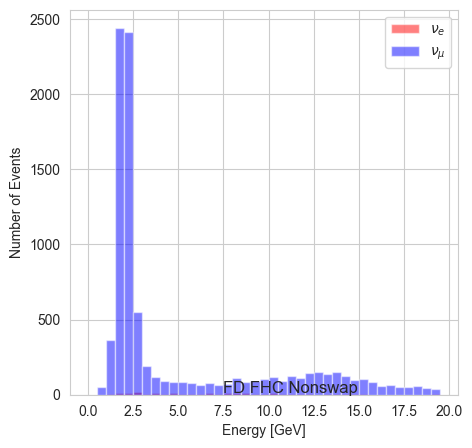

In [38]:
# Plot the Energy of the nue and numu events
fig_Enu = plt.figure(figsize=(5, 5))

binning_flux = np.arange(0, 20, 0.5)

# create the histogram, patches does nothing, but you need it...
hist_nue, bins, patches = plt.hist(df_Nue['E'], bins=binning_flux, range=(0, 20), color='red', alpha=0.5, label=r'$\nu_e$')
hist_numu = plt.hist(df_Numu['E'], bins=binning_flux, range=(0, 20), color='blue', alpha=0.5, label=r'$\nu_\mu$')
plt.xlabel('Energy [GeV]')
plt.ylabel('Number of Events')
plt.legend([r'$\nu_e$', r'$\nu_\mu$'])



# do this only for the nue events...
#NOTE: we could do this for the Numu here too. But there are basically no numu events.
mode_index = hist_nue.argmax() # the bin with the most events
max_nue = hist_nue.max() # the max number of events in this bin

# the most frequent bin
print('the most frequent bin:  (' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ') GeV. ' + str(mode_index) +' bin')
# the mode         
mode_nue = (bins[mode_index] + bins[mode_index+1])/2
print('with bin content: '+ str(max_nue) + ' events')

# Obtain the x-value of the maximum from a histogram. Similar to ROOT's GetBinCenter(TH1 h->GetMaximum())
u, indices = np.unique(df_Nue['E'].to_numpy(), return_inverse=True) # Main functionality to return energy from most frequent bin
print('Energy at the peak of the distribution: ', u[np.argmax(np.bincount(indices))]) # Energy of most events

plt.text(7.5, max_nue, 'FD {} {}'.format(HORN, FLUX), fontsize=12)
plt.show()

# save the plot
for ext in ['pdf', 'png']:
    fig_Enu.savefig(PLOT_DIR + '/FD_{}_{}_Enu.'.format(HORN, FLUX) + ext, dpi=300)
    


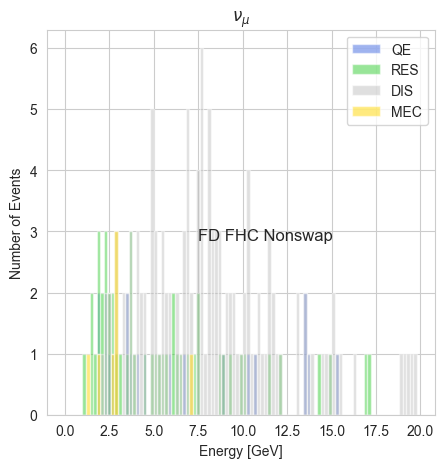

In [39]:
# Plot the interaction types vs. energy
fig_Modes = plt.figure(figsize=(5, 5))

binning_flux = np.arange(0, 20, 0.2)
hist_QE, bins, patches = plt.hist(df_Nue[df_Nue['Mode'] == 0]['E'], bins=binning_flux, range=(0, 20), color=mode_colors['QE'], alpha=0.5, label='QE')
hist_Res, binsRES, patchesRES = plt.hist(df_Nue[df_Nue['Mode'] == 1]['E'], bins=binning_flux, range=(0, 20), color=mode_colors['Res'], alpha=0.5, label='RES')
hist_DIS, binsDIS, patchesDIS = plt.hist(df_Nue[df_Nue['Mode'] == 2]['E'], bins=binning_flux, range=(0, 20), color=mode_colors['DIS'], alpha=0.5, label='DIS')
hist_MEC, binsMEC, patchesMEC = plt.hist(df_Nue[df_Nue['Mode'] == 10]['E'], bins=binning_flux, range=(0, 20), color=mode_colors['MEC'], alpha=0.5, label='MEC')


plt.xlabel('Energy [GeV]')
plt.ylabel('Number of Events')
plt.legend(loc='upper right')
plt.text(7.5, hist_Res.max() * 0.95, 'FD {} {}'.format(HORN, FLUX), fontsize=12)
plt.title(r'$\nu_e$' if FLUX == 'Fluxswap' else r'$\nu_\mu$', loc='center', fontsize=12)

plt.show()
for ext in ['pdf', 'png']:
    fig_Modes.savefig(PLOT_DIR + '/FD_{}_{}_Enu_modes.'.format(HORN, FLUX) + ext, dpi=300)

